# Python for Data Science Practice Session 5 : Mathematics and Statistics

In this session, we will through two classification problems. We will be learning how to use Logistic Regression in the first mini-project, and a Feed Forward Neural Network in the second one.

## NBA Dataset

Our dataset for this mini-project is about NBA players. It contains the performance metrics of each NBA player, and those metrics will be used to predict whether the basketball player's career will last for more than 5 years or not.

In [1]:
#Import Pandas, Numpy, Matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Import dataset
nba = pd.read_csv('data/nba_logreg.csv')

In [3]:
#Import the first 5 rows 
nba.head()

,name,gp,min,pts,fgm,fga,fg,3p_made,3pa,3p,...,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


In [4]:
#Import the dataset's info
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         1340 non-null   object 
 1   gp           1340 non-null   int64  
 2   min          1340 non-null   float64
 3   pts          1340 non-null   float64
 4   fgm          1340 non-null   float64
 5   fga          1340 non-null   float64
 6   fg           1340 non-null   float64
 7   3p_made      1340 non-null   float64
 8   3pa          1340 non-null   float64
 9   3p           1329 non-null   float64
 10  ftm          1340 non-null   float64
 11  fta          1340 non-null   float64
 12  ft           1340 non-null   float64
 13  oreb         1340 non-null   float64
 14  dreb         1340 non-null   float64
 15  reb          1340 non-null   float64
 16  ast          1340 non-null   float64
 17  stl          1340 non-null   float64
 18  blk          1340 non-null   float64
 19  tov   

In [5]:
#How many missing values do we have?
print('missing value table \n',nba.isna().sum())
print('total number of missing values is ',nba.isna().sum().sum())

missing value table 
 name            0
gp              0
min             0
pts             0
fgm             0
fga             0
fg              0
3p_made         0
3pa             0
3p             11
ftm             0
fta             0
ft              0
oreb            0
dreb            0
reb             0
ast             0
stl             0
blk             0
tov             0
target_5yrs     0
dtype: int64
total number of missing values is  11


Using what you learned from the fourth session, impute the missing data in this dataset with whichever imputation method you think is best.

In [6]:
#Impute the missing data
import impyute as impy
nba_array = np.array(nba.iloc[:,1:])
nba_imputed = impy.mean(nba_array) # this line mean imputes the missing data for the whole data set (excluding the names column)
nba.iloc[:,1:] = nba_imputed

C:\Users\User\AppData\Local\Temp\ipykernel_13332\3506665977.py:5: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  nba.iloc[:,1:] = nba_imputed


In [7]:
#View a summary of the dataset
nba.describe()

,gp,min,pts,fgm,fga,fg,3p_made,3pa,3p,ftm,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,60.414179,17.624627,6.801493,2.629104,5.885299,44.169403,0.247612,0.779179,19.308126,1.297687,1.821940,70.300299,1.009403,2.025746,3.034478,1.550522,0.618507,0.368582,1.193582,0.620149
std,17.433992,8.307964,4.357545,1.683555,3.593488,6.137679,0.383688,1.061847,15.956966,0.987246,1.322984,10.578479,0.777119,1.360008,2.057774,1.471169,0.409759,0.429049,0.722541,0.485531
min,11.000000,3.100000,0.700000,0.300000,0.800000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,47.000000,10.875000,3.700000,1.400000,3.300000,40.200000,0.000000,0.000000,0.000000,0.600000,0.900000,64.700000,0.400000,1.000000,1.500000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,63.000000,16.100000,5.550000,2.100000,4.800000,44.100000,0.100000,0.300000,22.200000,1.000000,1.500000,71.250000,0.800000,1.700000,2.500000,1.100000,0.500000,0.200000,1.000000,1.000000
75%,77.000000,22.900000,8.800000,3.400000,7.500000,47.900000,0.400000,1.200000,32.500000,1.600000,2.300000,77.600000,1.400000,2.600000,4.000000,2.000000,0.800000,0.500000,1.500000,1.000000
max,82.000000,40.900000,28.200000,10.200000,19.800000,73.700000,2.300000,6.500000,100.000000,7.700000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.400000,1.000000


Now, to get the dataset ready to be input into a classification model, drop the column `Name`

In [8]:
#Drop the columnn Name
nba.drop(['name'], axis=1, inplace=True)

## Logistic Regression

Logistic Regression is a traditional statistical modelling technique that is also used a lot in Machine Learning applications. If you have never seen it before, I would recommend you to watch StatQuest's video about Linear Regression from here (https://www.youtube.com/watch?v=yIYKR4sgzI8) to get the intuition behind it.

StatQuest also has a series of three other videos that go through specifics such as the model's co-efficients and how they are calculated.

-  - - - 

Start by creating your `X` and `y` variables

In [9]:
#Create X and y
X = nba.drop(columns = 'target_5yrs')
y = nba.target_5yrs

Using `train_test_split` as taught in the teaching session, create `X_train`, `X_test`, `y_train` and `y_test` with `test_size` of 0.2, and `random_state` of 0

In [10]:
#Create X_train, X_test, y_train and y_test
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Now, we are going to standardize the data in X. The predictors in Logistic Regression have parameters associated with them that can be adjusted to take the different scales of the predictors into consideration, and so the difference in scales does not help in that matter. We standardize the data to help speed up the process of the convergence of the iterative algorithm that is used by Python to calculate those parameters. 

We will be using `StandardScaler()` to do this as shown in the teaching session, but there is one thing I must add here that is different to how we used it in the clustering application. The scaling should be fitted <b>ONLY</b> on the training data, and not on both the training and test data. In a real life project, you only have access to your training data when you are creating your model, so you should think of your test data here as being unseen data. You should not touch it except when you have your model ready to be used on unseen data. Even when we assess the performance of our model, we will be using a subset of our training data called validation data to test our model on. Once we are pleased with the performance of our model, we can then apply it on our test data. This will all be clear in a bit. 

For now, fit and transform the training data using `StandardScaler()` and then transform the test data using the same scaler. You can find the documentation for `StandardScaler()` here (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) if you're interested in learning more about its parameters.

In [11]:
#Standardize your data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) #remember to reassign the scaled sets
X_test = scaler.transform(X_test)

Now, import `LogisticRegression()` from `sklearn.linear_model`. You can find the documentation for `LogisticRegression()` here (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) if you're interested in learning more about its parameters.

In [12]:
#Import LogisticRegression
from sklearn.linear_model import LogisticRegression

Now, we are going to create a Logistic Regression model and call it classifier. The only parameter I want you to specify is the `random_state` and I want you to set it to 0.

In [13]:
#Create a logistic regression model, call it classifier, and set random_state to 0
classifier = LogisticRegression(random_state = 0)

Now, we will start focussing on the performance of Logistic Regression on this dataset. This gets us back to the idea of validation data. The way we test the accuracy of the model is by using something called K-Fold Cross Validation. As explained in the teaching session, the training data gets split up into K folds. The model is then fitted to K-1 folds, and tested on the left-out fold. This process is then repeated on all of the combinations of K-1 folds, and all the left-out folds. The left out fold is what we call the validation data. From its name, the validation data is used to validate the performance and accuracy of our model. For each process, the accuracy of the model is calculated by testing its performance on the validation data. After finishing all of the processes, we will get the average value for the accuracies as an indicator on the general performance of the model.

It might seem unintuitive to use validation data as a way to test the performance of our model, even though we have defined what our test data is. But think about this for a moment. In real life projects, the test data generally do not come with their response variables, so how will we assess the performance of our model? What will we compare our predictions to? This is where validation data comes in handy. 

Now, import `cross_val_score` from `sklearn.model_selection`. You can find the documentation for `cross_val_score` here (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) if you're interested in learning more about its parameters.

Use it to perform a 5-Fold Cross Validation, and output the average accuracy of the model on the 5 validation sets. 

In [14]:
#Calculate the cross validation score over 5 folds
from sklearn.model_selection import cross_val_score
lr_score = cross_val_score(classifier, X_train, y_train)
lr_score.mean() # having convergence issues here for logistic regression

0.7098500326016083

We get an accuracy of approximately 71%.

Now, fit the model on all of the training data

In [15]:
#Fit the model on the training data
classifier.fit(X_train,y_train)

LogisticRegression(random_state=0)

### Test model on the test data

Create a variable called `y_pred` that contains the predictions of the test data in our model

In [16]:
#Create y_pred
y_pred = classifier.predict(X_test)

Output the accuracy of the model on the test data

In [17]:
#Output the accuracy of the model on the test data
#print('The accuracy is', (y_pred == y_test).sum()/(y_pred.size)) <- alternative statement
print('The accuracy is', round(1 - (sum((y_test - y_pred)**2) / len(y_test)), 3) )

The accuracy is 0.701


We get an accuracy of approximately 70% on the test data, which is not too far off from what we got as an average over the validation data. 

Is this the best we can do? Definitely there is room for improvement, but I will leave this for you to explore if you're interested in exploring other classification models, or maybe even doing a little bit of feature engineering to improve the performance of logistic regression on this dataset.

## Is the accuracy metric enough?

Although accuracy is a good starting point to illustrate our model's predictive performance, it does come with some caveats. This is perhaps better illustrated by an example:

>**Example:**
>
> *Imagine if I told you I can build a machine learning model that predicts whether or not an applicant is admitted into Harvard with 96.4% accuracy. Sounds good right! Now what if I told you the model works by predicting `NOT_ACCEPTED` to every applicant, irrespective of any data observed. This works as Harvard has a 4.6% admissions rate, but is our model any good?*  

Often, we must consider using other metrics in classification. The best way to start out is by analysing how true positives/negatives are distributed among classes. We can do this through a confusion matrix, which represents this distribution in the following form:


<img src='https://miro.medium.com/max/2102/1*fxiTNIgOyvAombPJx5KGeA.png' width="450" height="400">


To output the confusion matrix of our predictions, we use the `confusion_matrix()` function from scikit learn (for documentation, see [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html?highlight=confusion#sklearn.metrics.confusion_matrix)). Try outputting the confussion matrix for the model applied to the test data:

In [18]:
#Import confusion_matrix and create a confusion matrix using y_pred and y_test
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix for the logistic regression is \n',cm)
cm[0,1]

confusion matrix for the logistic regression is 
 [[ 64  54]
 [ 26 124]]


54

As you can see, the model's false negatives are approximately double that of the false positives. 

In [19]:
#Sensitivity = TP/(TP+FN)
#Specificity = TN/(TN+FP)

print('Sensitivity is ' ,cm[0,0]/(cm[:,0].sum()))
print('Specificity (recall) is ' ,cm[1,1]/(cm[:,1].sum()))

Sensitivity is  0.7111111111111111
Specificity (recall) is  0.6966292134831461


The sensitivity and specificity of our model are both very close around 0.7, suggesting that the model is not overly biased toward one particular outcome

In [20]:
#NPV (Negeative predictive value) = TN/(TN + FN)
#PPV (Positive predictive value) = TP/(TP + FP)
print('NPV is:' ,cm[1,1]/(cm[1,0] + cm[1,1]))
print('PPV is:' ,cm[0,0]/(cm[0,0] + cm[0,1]))

NPV is: 0.8266666666666667
PPV is: 0.5423728813559322


In [21]:
#f1 score: precision *recall/(precision + recall)
p = cm[0,0]/(cm[0,0] + cm[0,1])
r = cm[1,1]/(cm[:,1].sum())
print('F1 score is:',p*r/(p+r))

F1 score is: 0.304949277589917


In some cases, the effect of false negatives might outweigh the effects of false positives. Think for example of a model that is used to predict whether a person has cancer or not. Falsely predicting that someone has cancer is not ideal, but it is far less problematic than falsely predicting that someone does not have cancer. It could be fatal. This is why, accuracy on its own is not enough to measure the performance of the model.

There are other metrics for you to look into such as:
- <b>Sensitivity</b> (Sometimes called as <b>Recall</b>)

- <b>Specificity</b> 

- <b>PPV</b> (Sometimes called as <b>Precision</b>)

- <b>NPV</b>

- <b>F1 Score</b>.

## Can we improve the performance of our Logistic Regression model?

### Dimensionality Reduction

One thing that you might have noticed is that we have have a large dimensional dataset (19 columns), and we don't have enough data points (1340 rows). This could lead to overfitting. Think about it in this way. The more features we have, the more complex our model can be, and the more it can align itself to fit the training data more. This could lead to the model fitting to the noises as well, which is not what we want. We want a model that generalises well and captures the main structure and properties of the data; to perform well on unseen data. 

The problems arising from having high dimensional data is called the Curse of Dimensionality. You can read more about it here: https://en.wikipedia.org/wiki/Curse_of_dimensionality#Machine_Learning

One way to help with this is to reduce the dimensionality of our data. We are going to use a model called PCA to do this. Read more about it from here: https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c

### PCA

Import `PCA` from `sklearn.decomposition`. You can find its documentation here (https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) if you'd like to read more about its parameters.

In [22]:
#Import PCA
from sklearn.decomposition import PCA

Create a PCA model with `12` components.

In [23]:
#Create a PCA model with 12 components
pca = PCA(n_components = 12)

In [24]:
#Fit and transform X using the pca model, name it as X_reduced
X_reduced = pca.fit_transform(X)

Now using X_reduced, follow the exact same steps as before. To help remind you, here is a list of the steps that you should follow:

1) Create training and test data using `train_test_split`

2) Standardize the data

3) Create the classifier

4) Use 5-Fold Cross Validation to calculate the average accuracy of the model

5) Fit the classifier on the whole training data

6) Predict with the model on the test data

7) Calculate the accuracy of the model on the test data

In [25]:
#Create training and test data
X_train, X_test, y_train, y_test = train_test_split(X_reduced,y)

In [26]:
#Standardize your data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
#Create the classifier
classifier = LogisticRegression()

In [28]:
#Calculate the cross_val_score
log_reg_score = cross_val_score(classifier, X_train,y_train).mean()
log_reg_score

0.7134328358208956

In [29]:
#Fit the model on the training data
classifier.fit(X_train,y_train)

LogisticRegression()

In [30]:
#Predict the test data
y_pred = classifier.predict(X_test)

In [31]:
#Calculate the accuracy of the model on the test data
print('The accuracy is', round(1 - (sum((y_test - y_pred)**2) / len(y_test)), 3) )

The accuracy is 0.684


The increase in the cross validation score is insignificant, but the increase in the accuracy on the test data is definitely very welcome. 

In [32]:
cm = confusion_matrix(y_test,y_pred)
print('confusion matrix for the logistic regression is \n',cm)
cm[0,1]

confusion matrix for the logistic regression is 
 [[ 53  70]
 [ 36 176]]


70

As you can see, the model's false negatives are approximately double that of the false positives. 

In [33]:
print('Sensitivity is ' ,cm[0,0]/(cm[:,0].sum()))
print('Specificity (recall) is ' ,cm[1,1]/(cm[:,1].sum()))

Sensitivity is  0.5955056179775281
Specificity (recall) is  0.7154471544715447


The specificity is similar to the previous, but the sensitivity is greatly reduced (factor of 19%)

In [34]:
print('NPV is:' ,cm[1,1]/(cm[1,0] + cm[1,1]))
print('PPV is:' ,cm[0,0]/(cm[0,0] + cm[0,1]))

NPV is: 0.8301886792452831
PPV is: 0.43089430894308944


PPV also sees a remarkable decrease

In [35]:
#f1 score: precision *recall/(precision + recall)
p = cm[0,0]/(cm[0,0] + cm[0,1])
r = cm[1,1]/(cm[:,1].sum())
print('F1 score is:',p*r/(p+r))

F1 score is: 0.26892694458859484


- - - -- 

## An introduction to Feed Forward Neural Networks

In this section, we are going to apply a very simple feed forward neural network on the popular MNIST dataset. The MNIST dataset contains 28x28 images of hand-written digits. We will be using the neural network to predict the digit that is drawn in the image.

It would be useless to go through the tasks of this section without having at least a simple intuition into how a feed forward neural network works. I would highly recommend watching the 3Blue1Brown series about neural networks (or at least the first video), which you can access from here: https://www.youtube.com/watch?v=aircAruvnKk

There are also loads of other resources online which you can check out to learn more about the specifics of neural networks, as well as other forms of neural networks such as Convolutional Neural Networks, Recurrent Neural Networks, etc. 

Now, we will be using a very popular library for Machine Learning called <b> TensorFlow</b>. TensorFlow is an open source free library on Python used across a range of tasks but has a particular focus on the training and inference of neural networks. To install it, type on your command line/terminal `pip install tensorflow`. Then, import it into this notebook as `tf`. Also, import `sklearn`. 

In [37]:
#Import tensorflow as tf and sklearn 
import tensorflow as tf
import sklearn

Now, we are going to retrieve the MNIST dataset from TensorFlow. Specifically, from a high-level API called Keras that is built on top of TensorFlow, with a focus on implementing deep learning models (i.e. Neural Networks with large numbers of hidden layers) with an intuitive approach. Use `tf.keras.datasets` to retrieve the MNIST dataset, and call it `mnist`. You can read more about this here (https://www.tensorflow.org/api_docs/python/tf/keras/datasets)

In [42]:
#Retrieve the dataset from TensorFlow, and call it mnist
mnist = tf.keras.datasets.mnist

By typing `mnist.load_data()`, it outputs a 2x2 block matrix, where the first row of blocks contain the x_train matrix and y_train vector, and the second row of blocks contain the x_test matrix and the y_test vector. Use this info to create `x_train`, `y_train`, `x_test` and `y_test` 

In [51]:
#Load the training and the test data
x_train = mnist.load_data()[0][0]
y_train = mnist.load_data()[0][1]
x_test = mnist.load_data()[1][0]
y_test = mnist.load_data()[1][1]

Print the shape of `X_train`, `y_train`, `X_test` and `y_test` to have an overview of the number of images that we have in the training and test sets:

In [52]:
#Print the shape of x_train, y_train, x_test and y_test
print( "X_train's shape is" ,x_train.shape )
print( "y_train's shape is" , y_train.shape)
print( "X_test's shape is" , x_test.shape)
print( "y_test's shape is" , y_test.shape)

X_train's shape is (60000, 28, 28)
y_train's shape is (60000,)
X_test's shape is (10000, 28, 28)
y_test's shape is (10000,)


In [54]:
#View the first data entry in x_train
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [55]:
#View the first data entry in y_train
y_train[0]

5

As you can see:
- A data entry in X_train consists of a 28x28 matrix, where each entry in the matrix represents the pixel value at this position in the image. 

- A data entry in y_train consists of the digit that is drawn in the image.

Now, plot the first three images from the training data:

<b> Hint: </b> Look up `plt.imshow`

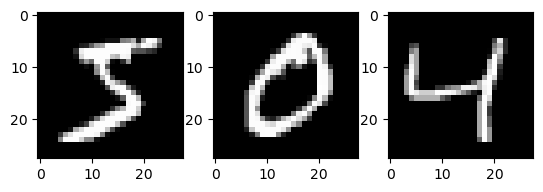

In [69]:
#Plot the first three images
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,3)
ax[0].imshow(x_train[0], cmap='gray')
ax[1].imshow(x_train[1], cmap='gray')
ax[2].imshow(x_train[2], cmap='gray')
plt.show()

Now that we have understood the structure of our data, let us start working on creating the neural network. 

-- - - - -

A first step that is commonly used for projects like this one is to normalise the input data. Similar to Logistic Regression, it helps in speeding up the process of learning for the neural network, and can help in saving memory as well.

Use `tf.keras.utils.normalize` to do so. You can find its documentation here (https://www.tensorflow.org/api_docs/python/tf/keras/utils/normalize). Apply it to X_train, and set `axis` to 1

In [70]:
#Apply tf.keras.utils.normalize on x_train and set axis to 1
x_train = tf.keras.utils.normalize(x_train, axis = 1)

- - - - -

Now, we are going to create our model for the neural network. One thing that you will most probably hear would be that building a neural network is sort of a form of art. There are lots of properties for the neural network that have loads of different options available, and you, the artist, get to choose and match the ones that you think would work best for your specific case. For this project, I will tell you what options to choose, and explain them briefly.

To start off, we will choose a model from Keras called Sequential. A Sequential model is a model which allows you to create layers in a step by step fashion, which is what we want in our Feed Forward Neural Network.

You can find its documentation here (https://www.tensorflow.org/api_docs/python/tf/keras/Sequential). Create a sequential model using the code `tf.keras.models.Sequential()`, and name it `model`

In [71]:
#Create a sequential model using the code `tf.keras.models.Sequential()`, and name it `model`
model = tf.keras.models.Sequential()

Next, we are going to create the layers for our neural network. In our case, we are going to have 1 input layer, two hidden layers and an output layer. 

Starting from the input layer, we would like to flatten the input layer as it was explained in the 3Blue1Brown video, so that we have one layer of 784 (28 x 28) nodes to accompany the pixels that we have. 

Use `model.add(tf.keras.layers.Flatten())`. You can find its documentation here (https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten)

In [72]:
#Flatten the input layer
model.add(tf.keras.layers.Flatten())

Next, we are going to create the two hidden layers. We are going to let them have 128 nodes, with an activation function called ReLU.

### ReLU

ReLU - Rectified Linear Unit - is one of the most popular activation functions that are used for Neural Networks. It is defined as: 

$$ f(x) = max(x,0) $$



Plot the function in order to get an idea of what it looks like:

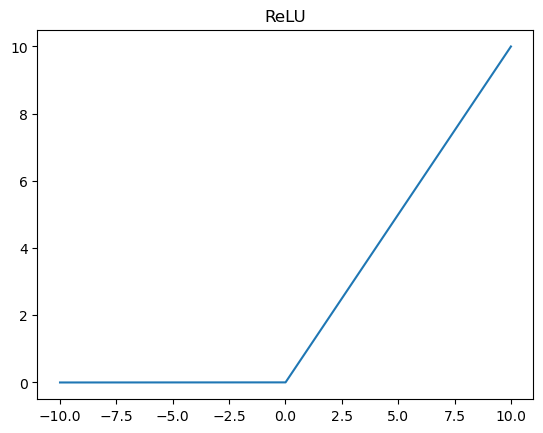

In [78]:
#Plot the ReLU function
x = np.linspace(-10,10,10000)
y = np.maximum(x,0)

plt.plot(x,y)
plt.title('ReLU')
plt.show()

Here is a link where you can read more about activation functions such as sigmoid and tanh, their drawbacks, and how ReLU outperforms them in some scenarios: https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/

Now, add the two hidden layers using the code `model.add(tf.keras.layers.Dense( -- arguments to be specified by you -- ))`, You can find its documentation here (https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense).

Set the number of nodes to `128` and the activation function to `tf.nn.relu`:

In [79]:
# Add the two hidden layers
model.add(tf.keras.layers.Dense(128,activation = tf.nn.relu))

Now, we are going to add the output layer. As we have 10 classes, where each class represents a specific digit, we are going to set the nodes to `10`. As for the activation function, we are going to be using a function called softmax, which is called `tf.nn.softmax` in TensorFlow. In a nutshell, what softmax does is similar to what a logistic/sigmoid function does in logistic regression. It outputs a probability distribution taking values in the 10 different classes we have, so that each class has a probability associated with it, and the sum of the probabilities across the classes equal 1. 

Use `model.add(tf.keras.layers.Dense( -- arguments to be specified by you -- ))` again, set the nodes to `10` and the activation function to `tf.nn.softmax`

In [81]:
#Add the output layer with 10 nodes and softmax activation function
model.add(tf.keras.layers.Dense(10,activation = tf.nn.softmax))

Now that we have created our layers, all we need to do now is to specifiy an optimizer for the neural network, a loss function and the metrics we would like to keep track of. 

- - - - - 

<b>Loss function:</b> This is a map

$$ L : Y \times Y \to \mathbb{R} $$

which takes in the predicted value for y, the true value for y, and outputs a real number. It is created in a way in which it penalises inaccuracy and incorrectness. This means that, the farther away the predicted value is from the true value (in the continuous case), or when the predicted value is not equal to the true value (in the discrete case), the output of the loss function is larger.

An example in the continuous case would be the mean squared error:

$$ L(Y^*, Y) = (Y^* - Y)^2 $$

An example in the discrete case is the zero-one loss:

$$ L(Y^*, Y) = \mathbb{1} \{Y^* \neq Y\} $$

When calculating the loss over the training data, you apply the loss function over every training point, sum over all of  the them and then average them.

Intuitively, we are aiming for having more accurate predictions, which corresponds to having smaller loss function over the training data. One very important thing to mention is that using the parameters that minimise the loss function is not always ideal. Similar to what we had with Logistic Regression, It could lead to the model fitting to the training data extremely well, to the point that it learns the random noises of the training data and hence leads to overfitting and poor performance over unseen data. The main goal is to find parameters that learn the main structure and properties of the data to generalise and perform well over unseen data (the test data). 

This leads on well to what an optimizer is.

<b>Optimizer:</b> An optimizer is an algorithm that is used to adjust the parameters of the model in a way that leads to the decreasing of the loss function value over the training data. An example for this would be gradient descent, which you should have seen in the 3Blue1Brown videos. 

- - - -

Now, we are going to use an optimizer called <b> Adam (Adaptive Moment Estimation) </b>, which combines two stochastic gradient descent called <b> Adaptive Gradients </b> and <b> Root Mean Square Error </b>. Feel free to read more about them and find why this specific optimization algorithm is preferred to many other ones, but it's not essential to know how it works for now.

As for the loss function, we will be using <b> Sparse Categorical Cross Entropy</b>. To explain what that is, we should start by explaining <b>Categorical Cross Entropy</b>. 

Recall how the output layer contained $10$ nodes representing the probability distribution of the $10$ classes. We would like a loss function that would be able to measure in some way how close or far away two probability distributions are from each other. This is exactly what Categorical Cross Entropy does.

<b>Categorical Cross Entropy:</b> This is a loss function that compares the probability distributions of the true value and the predicted value. Let $K$ be the number of classes, and consider the training data given as pairs $(x,y)$, where $x$ is the vector of the predictor variables and $y$ is the response. $y \in \mathbb{R}^k $ is a vector containing the probabilities of the classes for the true value, where $y_j = 1 $ if $x$ belongs to class $j$, and $0$ otherwise. Let $y^*$ be the vector containing the predicted probabilities of the classes, We then have:

$$ L(y,y^*) = -\sum_{i=0}^{K} y_i log (y_i^*) + (1-y_i)log(1-y_i^*)  $$

For example, assume we have an image with a digit $5$ drawn in it. This means that $y$, the probability distribution for the true value, is equal to $(0,0,0,0,0,1,0,0,0,0)$. $y^*$ would be represented by a vector containing the values in the nodes in the output layer of our neural network, with each entry (or node in the layer) representing the probability of the image having a specific digit. $K$ would be equal to $10$. This means that the categorical cross entropy would be:

$$ L(y,y^*) = -\sum_{i=0}^{10} y_i log (y_i^*) + (1-y_i)log(1-y_i^*) $$

So, the closer $y_5^*$ is to $1$, the higher the probability that the image has the digit $5$ drawn in it, the smaller the loss function.

The one we are going to use is called <b> Sparse Categorical Cross Entropy</b>, which differs from the normal categorical cross entropy in the fact that we have $y$ taking values in $0,1,2,3, ... , 9$ instead of one-hot encoded vectors in $\mathbb{R}^k$ like the examples shown above.

-------

Now, use `mode.compile( -- arguments to be specified by you --  ) `, which you can find its documentation here (https://www.tutorialspoint.com/keras/keras_model_compilation.htm). 

Set the `optimizer` argument as `adam`, the `loss` argument as `sparse_categorical_crossentropy` and the `metrics` as `['accuracy']`

-------

Now, use `mode.compile( -- arguments to be specified by you --  ) `, which you can find its documentation here (https://www.tutorialspoint.com/keras/keras_model_compilation.htm). 

Set the `optimizer` argument as `adam`, the `loss` argument as `sparse_categorical_crossentropy` and the `metrics` as `['accuracy']`

In [84]:
#Use model.compile with the prescribed arguments
model.compile(optimizer ='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy']             
             )

Now, we are going to apply 5-Fold Cross Validation to assess the average accuracy of the model. This is a bit different to when we used `cross_val_score` from before, so you will find below a written function that takes as arguments the predictor and response variables for the training data, as well as the number of folds. (Definitely feel free to ignore my function and create your own one!) It will then output two lists called `scores` (containing the accuracy of the model over the 5 validation datasets) and `histories` containing information about the model fit on the different folds such as the value for the loss function over the training data and the validation loss of the validation data.

One thing that is new in my code is `epochs`. An epoch is the process of going through a step of forward propogation and back propogation to update the weights of the model. Setting `epochs=3` in the fitting function mean that we do this process 3 times over all of the data. One thing that you can explore is, at what value of epochs does the model start to overfit?

In [85]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import math

In [86]:
# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds):
    scores, histories = list(), list()
    # prepare cross validation
    kfold = KFold(n_folds, shuffle=True, random_state = 0)
    # enumerate splits
    for train_ix, test_ix in kfold.split(dataX):
        # select rows for train and test
        trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
        #define_model
        model = tf.keras.models.Sequential()
        model.add(tf.keras.layers.Flatten())
        model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
        model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
        model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
        model.compile(optimizer = 'adam',
             loss= 'sparse_categorical_crossentropy',
             metrics=['accuracy'])
        # fit model
        history = model.fit(trainX, trainY, epochs=3, validation_data=(testX, testY))
        # evaluate model
        acc = model.evaluate(testX, testY)[1]
        # stores scores
        scores.append(acc)
        histories.append(history)
    return scores, histories


Now, run the function on `x_train` and `y_train`, setting the number of folds to `5`, and save the output in a variable called `results`:

In [87]:
#Run the evaluate_model function
results = evaluate_model(x_train, y_train,5)

Epoch 1/3
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2933 - accuracy: 0.9158 - val_loss: 0.1444 - val_accuracy: 0.9567
Epoch 2/3
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1173 - accuracy: 0.9639 - val_loss: 0.1009 - val_accuracy: 0.9682
Epoch 3/3
375/375 [==============================] - 1s 2ms/step - loss: 0.0943 - accuracy: 0.9710
Epoch 1/3
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2894 - accuracy: 0.9150 - val_loss: 0.1739 - val_accuracy: 0.9473
Epoch 2/3
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1164 - accuracy: 0.9636 - val_loss: 0.1323 - val_accuracy: 0.9598
Epoch 3/3
375/375 [==============================] - 1s 2ms/step - loss: 0.1116 - accuracy: 0.9660
Epoch 1/3
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2913 - accuracy: 0.9129 - val_loss: 0.1624 - val_accuracy: 0.9507
Epoch 2/3
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1187 - acc

In [88]:
#View results
results

([0.9710000157356262,
  0.9660000205039978,
  0.9671666622161865,
  0.971666693687439,
  0.9668333530426025],
  <keras.callbacks.History at 0x26ec4905db0>])

Print the average accuracy over the different validation sets:

In [93]:
#Print the average accuracy over the different validation sets
print('The average accuracy over the different validation sets is', np.array(results[0]).mean())

The average accuracy over the different validation sets is 0.9685333490371704


Here is another function that provides visualisations of the cross entropy loss values and the accuracy for the training data and the validation data that we got over the 3 epochs in the 5-Fold Cross Validation:

In [95]:
def summarize_diagnostics(histories):
    for i in range(len(histories)):
        # plot loss
        fig, ax = plt.subplots(1,2)
        ax[0].set_title('Cross Entropy Loss')
        ax[0].plot(histories[i].history['loss'], color='blue', label='train', marker='.') 
        ax[0].plot(histories[i].history['val_loss'], color='orange', label='test', marker='.')
        ax[0].legend()
        # plot accuracy
        ax[1].set_title('Classification Accuracy')
        ax[1].plot(histories[i].history['accuracy'], color='blue', label='train', marker='.')
        ax[1].plot(histories[i].history['val_accuracy'], color='orange', label='test', marker='.')
        ax[1].legend()
    plt.show()
 

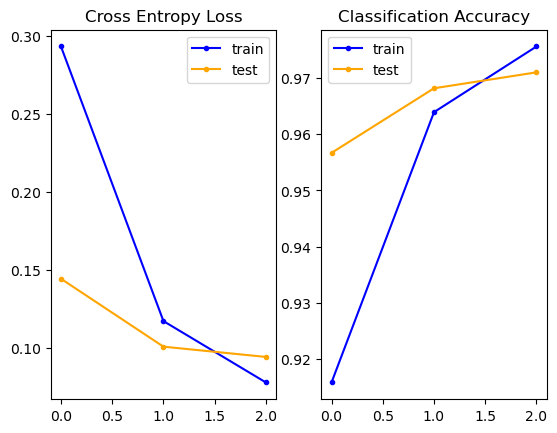

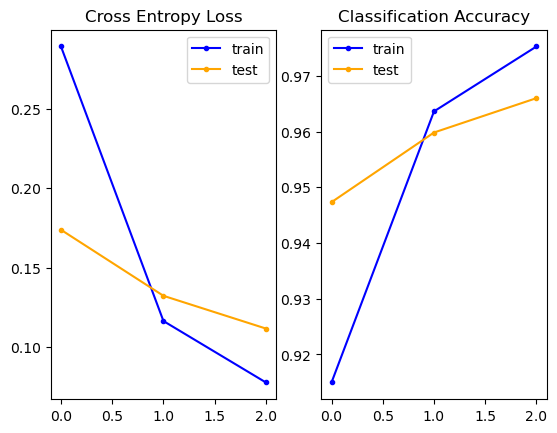

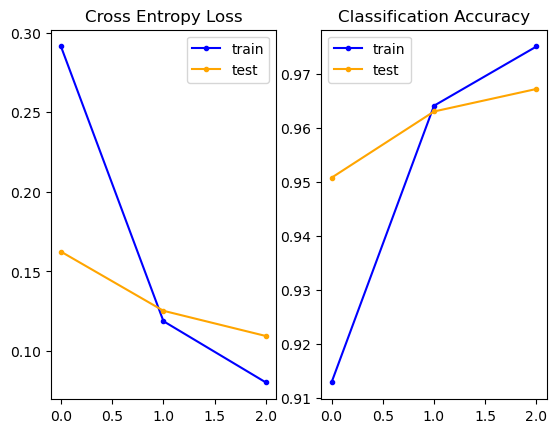

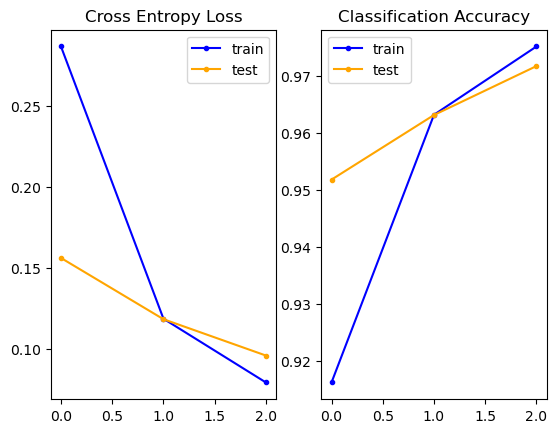

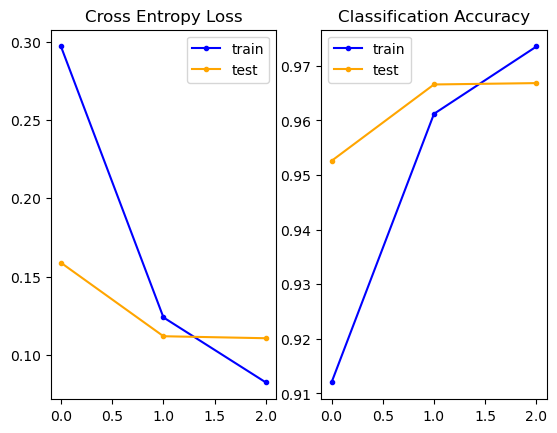

In [99]:
#Use summarize_diagnostics on histories
summarize_diagnostics(results[1])

Try to interpret those visualisations on your own. You can also plot them all on top of each other to get a general overview of how the cross entropy loss and accuracy change. You can use both the functions `evaluate_model` and `summarize_diagnostics` and try to experiment with different epochs values, different folds and how this might affect the values for the accuracy and the cross entropy loss on the training and validating data.

Now, fit the model on all of the training data, and output the accuracy on the test data by setting the `validation_data` parameter in the `model.fit()` function as y_test

In [102]:
#Fit the model on the training data

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer = 'adam',
             loss= 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3, validation_data = (x_test, y_test))
acc= model.evaluate(x_test, y_test)[1]


Epoch 1/3
1875/1875 [==============================] - 12s 5ms/step - loss: 2.3023 - accuracy: 0.1084 - val_loss: 2.2961 - val_accuracy: 0.1135
Epoch 2/3
1875/1875 [==============================] - 9s 5ms/step - loss: 2.3016 - accuracy: 0.1124 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 3/3
313/313 [==============================] - 1s 2ms/step - loss: 2.3007 - accuracy: 0.1135


In [105]:
print('The accuracy on the test data is', round(acc,3)) # something's gone wrong

The accuracy on the test data is 0.113


Nowadays, Feed Forward Neural Networks aren't the most powerful when it comes to image classification. Convolutional Neural Networks have become the standard for image classification due to the improvements they have in performance over the other neural networks. If you're interested, check out how a CNN works, and you can then have a look at this tutorial: https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d 
to understand how you can apply CNN on the MNIST dataset. 